In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import cartopy.crs as ccrs
import datetime
import matplotlib.colors as colors
import matplotlib as mpl
from matplotlib.colors import from_levels_and_colors
#from matplotlib.colors import DivergingNorm
from matplotlib.colors import TwoSlopeNorm
from cartopy.util import add_cyclic_point
import cartopy as cart
#import seaborn as sns
from scipy import signal
from scipy.ndimage import uniform_filter1d
from skyfield import api #time before CE
from scipy.signal import find_peaks
from scipy.optimize import curve_fit
from numpy.polynomial import Polynomial


In [2]:
tas_NH_nv_std = xr.open_dataset('tas_NH_nv_200yr_std.nc')
tas_NH_std = xr.open_dataset('tas_NH_200yr_std.nc')

In [3]:
tas_detr_LIA = xr.open_dataset('tas_NH_detr_200yr_LIA.nc')
tas_detr_MWP = xr.open_dataset('tas_NH_detr_200yr_MWP.nc')
tas_detr_LALIA = xr.open_dataset('tas_NH_detr_200yr_LALIA.nc')
tas_detr_4000BCE = xr.open_dataset('tas_NH_detr_200yr_4000BCE.nc')
tas_detr_3800BCE = xr.open_dataset('tas_NH_detr_200yr_3800BCE.nc')
tas_detr_RWP = xr.open_dataset('tas_NH_detr_200yr_RWP.nc')

In [4]:
list_tas_detr = [tas_detr_MWP['var167'],
              tas_detr_LIA['var167'],
              tas_detr_RWP['var167'],
              tas_detr_LALIA['var167'],
              tas_detr_4000BCE['var167'],
              tas_detr_3800BCE['var167']]

In [5]:
tas_detr_diff_1 = list_tas_detr[1]-list_tas_detr[0]
tas_detr_diff_2 = list_tas_detr[3]-list_tas_detr[2]
tas_detr_diff_3 = list_tas_detr[5]-list_tas_detr[4]

In [6]:
tas_detr_2sig = []

for i in range(len(list_tas_detr)):
    tas_detr_2sig.append(abs(list_tas_detr[i])-abs(tas_NH_nv_std['std']*2))

In [7]:
tas_diff_1_2sig = abs(tas_detr_diff_1)-abs(tas_NH_nv_std['std']*2)
tas_diff_2_2sig = abs(tas_detr_diff_2)-abs(tas_NH_nv_std['std']*2)
tas_diff_3_2sig = abs(tas_detr_diff_3)-abs(tas_NH_nv_std['std']*2)

In [8]:
sig0 = []

for i in range(6):
    sig0.append(np.where(tas_detr_2sig[i][:,:]>0.0,1,-1))

In [9]:
# Calculate mean difference --> rate of change per 100 years
tas_diff_1_mean = np.mean(tas_detr_diff_1[:,:])
tas_diff_2_mean = np.mean(tas_detr_diff_2[:,:])
tas_diff_3_mean = np.mean(tas_detr_diff_3[:,:])

Text(0.662, 0.349, '(i)')

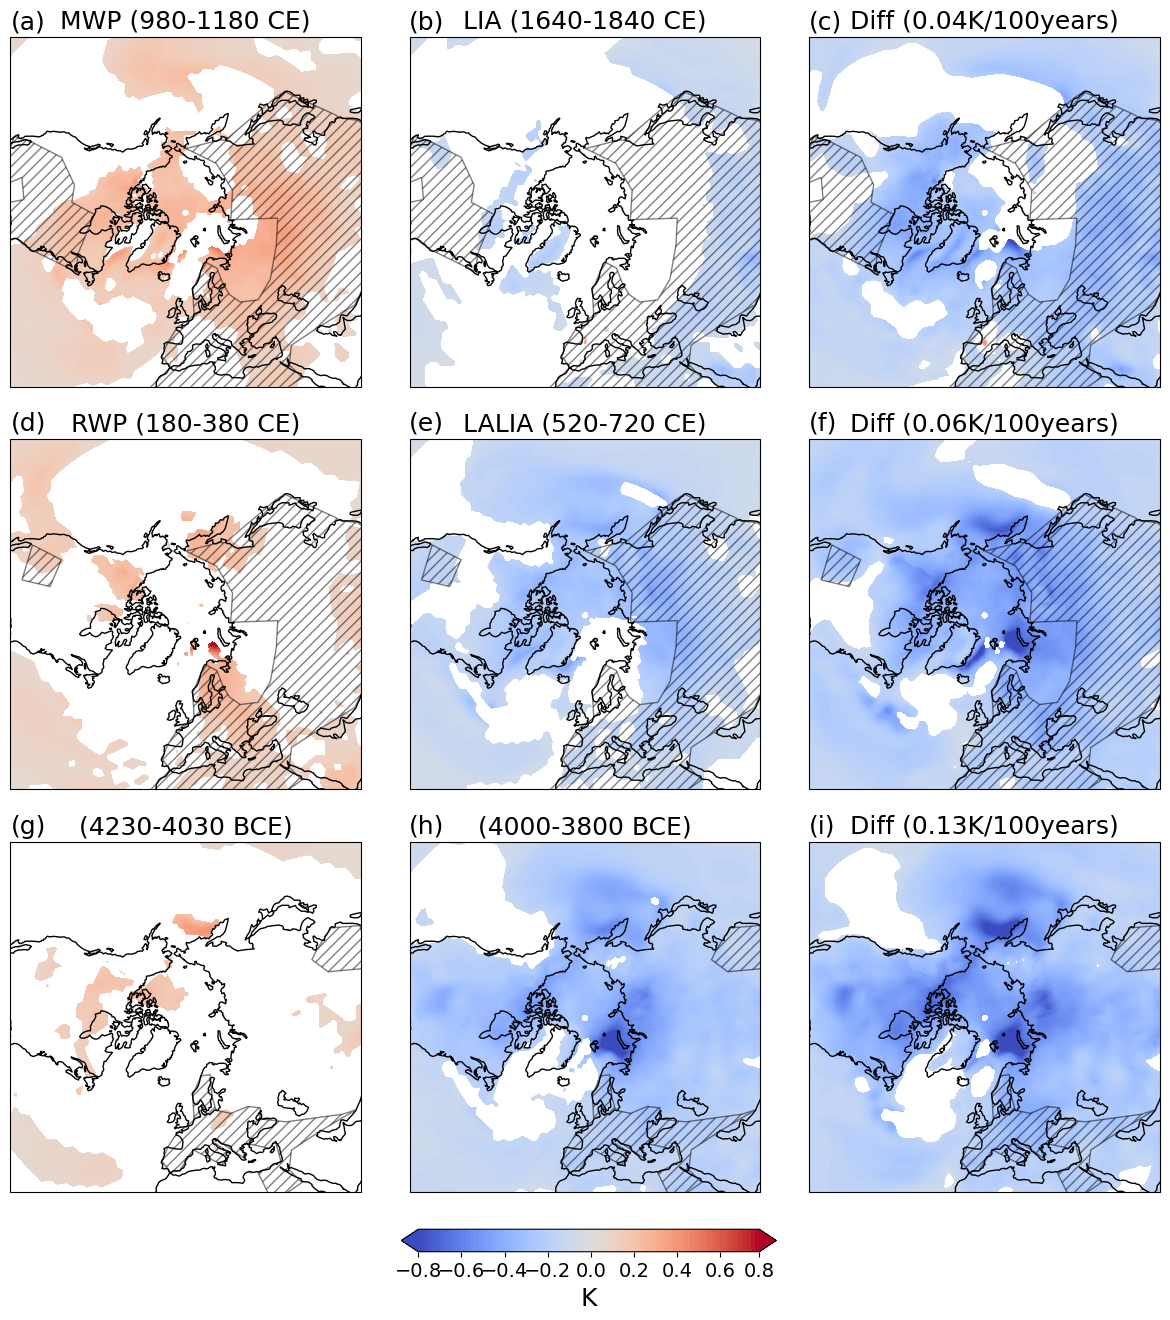

In [10]:
fig, axs = plt.subplots(3,3, figsize=(15,15), subplot_kw={"projection":ccrs.NorthPolarStereo()})
fig.subplots_adjust(hspace = 0.15, wspace=0.1)

#### Extent ####
coord_east=-180
coord_west=180
coord_south=30
coord_north=90

#### levels ####
vc=np.arange(-1,0.6,0.02)
tas_levels=np.arange(-0.8,0.8,0.02)

divnorm = colors.TwoSlopeNorm(vcenter=0)
divnorm2 = colors.TwoSlopeNorm(vcenter=0)

sig = sig0
data_crs = ccrs.PlateCarree()

density=3

#----------------------------------
#Eurasia
y = [36.1, 39.1, 43.7, 48.6, 52.8, 61.5, 67.8, 69.9, 66.5, 60.6, 56.2, 52.2, 49.3, 51.2, 55.0, 56.4, 73.0, 66.3, 59.7, 35.7, 28.6, 24.6, 21.5, 25.4, 30.2, 31.9, 27.8, 23.0, 22.3, 21.7, 36.1]
x = [-5.6, -9.3, -7.8, -4.3, 4.8, 5.3, 15.0, 22.9, 29.5, 27.8, 28.3, 31.5, 39.8, 52.0, 70.4, 86.7, 81.3, 179.9, 151.3, 140.7, 121.6, 118.2, 111.2, 61.4, 49.3, 38.7, 34.3, 35.3, 25.3, -16.5, -5.6]

#North America
y2 = [32.2, 42.0, 48.9, 49.0, 56.8, 45.7, 31.3, 25.5, 25.3, 30.1, 30.0, 34.0, 32.5, 25.9, 26.8, 32.2]
x2 = [-114.7, -114.1, -104.1, -95.3, -89.0, -61.7, -81.5, -80.1, -81.0, -84.2, -93.4, -94.7, -102.2, -97.4, -114.1, -114.7]

ax1 = plt.subplot(3,3,1)
ax1.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
ax1.coastlines()
ax1.set_title('MWP (980-1180 CE)',fontsize=18)
    
data, lon = add_cyclic_point(list_tas_detr[0][:,:], list_tas_detr[0]['lon'])
              
LIA=ax1.contourf(lon[:],list_tas_detr[0]["lat"][:], data, tas_levels,
                transform = data_crs, extend='both', cmap=plt.get_cmap('coolwarm'), norm=divnorm2)

data2, lon2 = add_cyclic_point(sig[0][:,:], list_tas_detr[0]['lon'])
    
stipples=ax1.contourf(lon2[:], list_tas_detr[0]["lat"][:], data2, colors='white',
                         levels=[-1,0], transform = data_crs) 

ax1.fill(x, y, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
ax1.fill(x2, y2, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
plt.text(0.13,0.885,'(a)', fontsize=18, transform=plt.gcf().transFigure)    
#-----------------------------------

ax2 = plt.subplot(3,3,2)
ax2.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
ax2.coastlines()
ax2.set_title('LIA (1640-1840 CE)',fontsize=18)
    
data, lon = add_cyclic_point(list_tas_detr[1][:,:], list_tas_detr[1]['lon'])
              
MWP=ax2.contourf(lon[:],list_tas_detr[1]["lat"][:], data, tas_levels,
                transform = data_crs, extend='both', cmap=plt.get_cmap('coolwarm'), norm=divnorm2)

data2, lon2 = add_cyclic_point(sig[1][:,:], list_tas_detr[1]['lon'])
    
stipples=ax2.contourf(lon2[:], list_tas_detr[1]["lat"][:], data2, colors='white',
                         levels=[-1,0], transform = data_crs) 

ax2.fill(x, y, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
ax2.fill(x2, y2, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
plt.text(0.395,0.885,'(b)', fontsize=18, transform=plt.gcf().transFigure)    

#-----------------------------------

ax3 = plt.subplot(3,3,3)
ax3.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
ax3.coastlines()
ax3.set_title('Diff (0.04K/100years)',fontsize=18)
    
data, lon = add_cyclic_point(tas_detr_diff_1[:,:], tas_detr_diff_1['lon'])
              
diff1=ax3.contourf(lon[:],tas_detr_diff_1["lat"][:], data, tas_levels,
                transform = data_crs, extend='both', cmap=plt.get_cmap('coolwarm'), norm=divnorm)

data2, lon2 = add_cyclic_point(tas_diff_1_2sig[:,:], tas_detr_diff_1['lon'])
    
stipples=ax3.contourf(lon2[:], tas_detr_diff_1["lat"][:], data2, colors='white',
                         levels=[-1,0], transform = data_crs) 

ax3.fill(x, y, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
ax3.fill(x2, y2, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
plt.text(0.662,0.885,'(c)', fontsize=18, transform=plt.gcf().transFigure)    

#------------------------------------
#Eurasia
y = [36.1, 39.1, 43.7, 48.6, 52.8, 61.5, 67.8, 69.9, 66.5, 60.6, 56.2, 52.2, 49.3, 51.2, 55.0, 56.4, 73.0, 66.3, 59.7, 35.7, 28.6, 24.6, 21.5, 25.4, 30.2, 31.9, 27.8, 23.0, 22.3, 21.7, 36.1]
x = [-5.6, -9.3, -7.8, -4.3, 4.8, 5.3, 15.0, 22.9, 29.5, 27.8, 28.3, 31.5, 39.8, 52.0, 70.4, 86.7, 81.3, 179.9, 151.3, 140.7, 121.6, 118.2, 111.2, 61.4, 49.3, 38.7, 34.3, 35.3, 25.3, -16.5, -5.6]

#North America
y2 = [32.2, 42.0, 41.2, 32.5, 32.2]
x2 = [-114.7, -114.1, -102.0, -102.2, -114.7]

ax4 = plt.subplot(3,3,4)
ax4.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
ax4.coastlines()
ax4.set_title('RWP (180-380 CE)',fontsize=18)
    
data, lon = add_cyclic_point(list_tas_detr[2][:,:], list_tas_detr[2]['lon'])
              
LALIA=ax4.contourf(lon[:],list_tas_detr[2]["lat"][:], data, tas_levels,
                transform = data_crs, extend='both', cmap=plt.get_cmap('coolwarm'), norm=divnorm2)

data2, lon2 = add_cyclic_point(sig[2][:,:], list_tas_detr[2]['lon'])
    
stipples=ax4.contourf(lon2[:], list_tas_detr[2]["lat"][:], data2, colors='white',
                         levels=[-1,0], transform = data_crs) 

ax4.fill(x, y, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
ax4.fill(x2, y2, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
plt.text(0.13,0.618,'(d)', fontsize=18, transform=plt.gcf().transFigure)    

#-------------------------------------

ax5 = plt.subplot(3,3,5)
ax5.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
ax5.coastlines()
ax5.set_title('LALIA (520-720 CE)',fontsize=18)
    
data, lon = add_cyclic_point(list_tas_detr[3][:,:], list_tas_detr[3]['lon'])
              
RWP=ax5.contourf(lon[:],list_tas_detr[3]["lat"][:], data, tas_levels,
                transform = data_crs, extend='both', cmap=plt.get_cmap('coolwarm'), norm=divnorm2)

data2, lon2 = add_cyclic_point(sig[3][:,:], list_tas_detr[3]['lon'])
    
stipples=ax5.contourf(lon2[:], list_tas_detr[3]["lat"][:], data2, colors='white',
                         levels=[-1,0], transform = data_crs) 

ax5.fill(x, y, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
ax5.fill(x2, y2, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
plt.text(0.395,0.618,'(e)', fontsize=18, transform=plt.gcf().transFigure)    

#-------------------------------------

ax6 = plt.subplot(3,3,6)
ax6.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
ax6.coastlines()
ax6.set_title('Diff (0.06K/100years)',fontsize=18)
    
data, lon = add_cyclic_point(tas_detr_diff_2[:,:], tas_detr_diff_2['lon'])
              
diff2=ax6.contourf(lon[:],tas_detr_diff_2["lat"][:], data, tas_levels,
                transform = data_crs, extend='both', cmap=plt.get_cmap('coolwarm'), norm=divnorm)

data2, lon2 = add_cyclic_point(tas_diff_2_2sig[:,:], tas_detr_diff_2['lon'])
    
stipples=ax6.contourf(lon2[:], tas_detr_diff_2["lat"][:], data2, colors='white',
                         levels=[-1,0], transform = data_crs) 

ax6.fill(x, y, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
ax6.fill(x2, y2, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
plt.text(0.662,0.618,'(f)', fontsize=18, transform=plt.gcf().transFigure)    

#------------------------------------
#Europe/Middle East
y = [36.1, 39.1, 43.7, 48.6, 52.8, 61.5, 67.8, 67.1, 59.8, 54.7, 51.8, 51.0, 48.1, 45.3, 39.3, 25.2, 30.2, 31.9, 27.8, 23.0, 22.3, 31.4, 31.1, 36.9, 36.2, 40.7, 40.9, 36.7, 45.7, 45.1, 39.9, 37.2, 43.2, 36.9, 36.1]
x = [-5.6, -9.3, -7.8, -4.3, 4.8, 5.3, 15.0, 23.4, 18.7, 18.2, 25.4, 35.0, 39.7, 36.4, 44.0, 61.6, 49.3, 38.7, 34.3, 35.3, 25.3, 25.1, 33.6, 36.1, 32.6, 26.2, 23.9, 23.0, 13.7, 12.1, 18.3, 13.9, 3.3, -2.1, -5.6]

#Asia
y2 = [38.4, 31.4, 24.2, 25.2, 37.7, 41.0, 38.4]
x2 = [117.4, 121.7, 117.9, 105.0, 107.9, 114.7, 117.4]


ax7 = plt.subplot(3,3,7)
ax7.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
ax7.coastlines()
ax7.set_title('(4230-4030 BCE)',fontsize=18)
    
data, lon = add_cyclic_point(list_tas_detr[4][:,:], list_tas_detr[4]['lon'])
              
cp=ax7.contourf(lon[:],list_tas_detr[4]["lat"][:], data, tas_levels,
                transform = data_crs, extend='both', cmap=plt.get_cmap('coolwarm'), norm=divnorm2)

data2, lon2 = add_cyclic_point(sig[4][:,:], list_tas_detr[4]['lon'])
    
stipples=ax7.contourf(lon2[:], list_tas_detr[4]["lat"][:], data2, colors='white',
                         levels=[-1,0], transform = data_crs) 

ax7.fill(x, y, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
ax7.fill(x2, y2, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
plt.text(0.13,0.349,'(g)', fontsize=18, transform=plt.gcf().transFigure)    

#-------------------------------------

ax8 = plt.subplot(3,3,8)
ax8.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
ax8.coastlines()
ax8.set_title('(4000-3800 BCE)',fontsize=18)
    
data, lon = add_cyclic_point(list_tas_detr[5][:,:], list_tas_detr[5]['lon'])
              
wp=ax8.contourf(lon[:],list_tas_detr[5]["lat"][:], data, tas_levels,
                transform = data_crs, extend='both', cmap=plt.get_cmap('coolwarm'), norm=divnorm2)

data2, lon2 = add_cyclic_point(sig[5][:,:], list_tas_detr[5]['lon'])
    
stipples=ax8.contourf(lon2[:], list_tas_detr[5]["lat"][:], data2, colors='white',
                         levels=[-1,0], transform = data_crs) 

cbar_ax = fig.add_axes([0.39, 0.07, 0.25, 0.015])
cbar_wp = plt.colorbar(wp, cax=cbar_ax, extend='both', orientation='horizontal', ticks=np.arange(-0.8,1,0.2), 
                       fraction=0.043, pad=0.04)
cbar_wp.ax.tick_params(labelsize=14)
cbar_wp.ax.set_xlabel('K', fontsize=18)

ax8.fill(x, y, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
ax8.fill(x2, y2, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
plt.text(0.395,0.349,'(h)', fontsize=18, transform=plt.gcf().transFigure)    

#-------------------------------------

ax9 = plt.subplot(3,3,9)
ax9.set_extent([coord_east, coord_west, coord_south, coord_north], ccrs.PlateCarree())
ax9.coastlines()
ax9.set_title('Diff (0.13K/100years)',fontsize=18)
    
data, lon = add_cyclic_point(tas_detr_diff_3[:,:], tas_detr_diff_3['lon'])
              
diff3=ax9.contourf(lon[:],tas_detr_diff_3["lat"][:], data, tas_levels,
                transform = data_crs, extend='both', cmap=plt.get_cmap('coolwarm'), norm=divnorm)

data2, lon2 = add_cyclic_point(tas_diff_3_2sig[:,:], tas_detr_diff_3['lon'])
    
stipples=ax9.contourf(lon2[:], tas_detr_diff_3["lat"][:], data2, colors='white',
                         levels=[-1,0], transform = data_crs) 

ax9.fill(x, y, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
ax9.fill(x2, y2, facecolor='none', hatch='///', transform = data_crs, edgecolor="black", alpha=0.5)
plt.text(0.662,0.349,'(i)', fontsize=18, transform=plt.gcf().transFigure)    

#cbar_ax = fig.add_axes([0.68, 0.07, 0.22, 0.015])
#cbar_diff3 = plt.colorbar(diff3, cax=cbar_ax, extend='both', orientation='horizontal', ticks=np.arange(-1,1,0.5),
#                       fraction=0.043, pad=0.04)
#cbar_diff3.ax.tick_params(labelsize=14)
#cbar_diff3.ax.set_xlabel('K', fontsize=18)

#------------------------------------

#plt.savefig('figures/tas_detr_200yr_min_max_diff_3_2sig_white_agr_hatching_a-i.png', bbox_inches='tight')